
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None


Missing Values:


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Class Distribution:


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

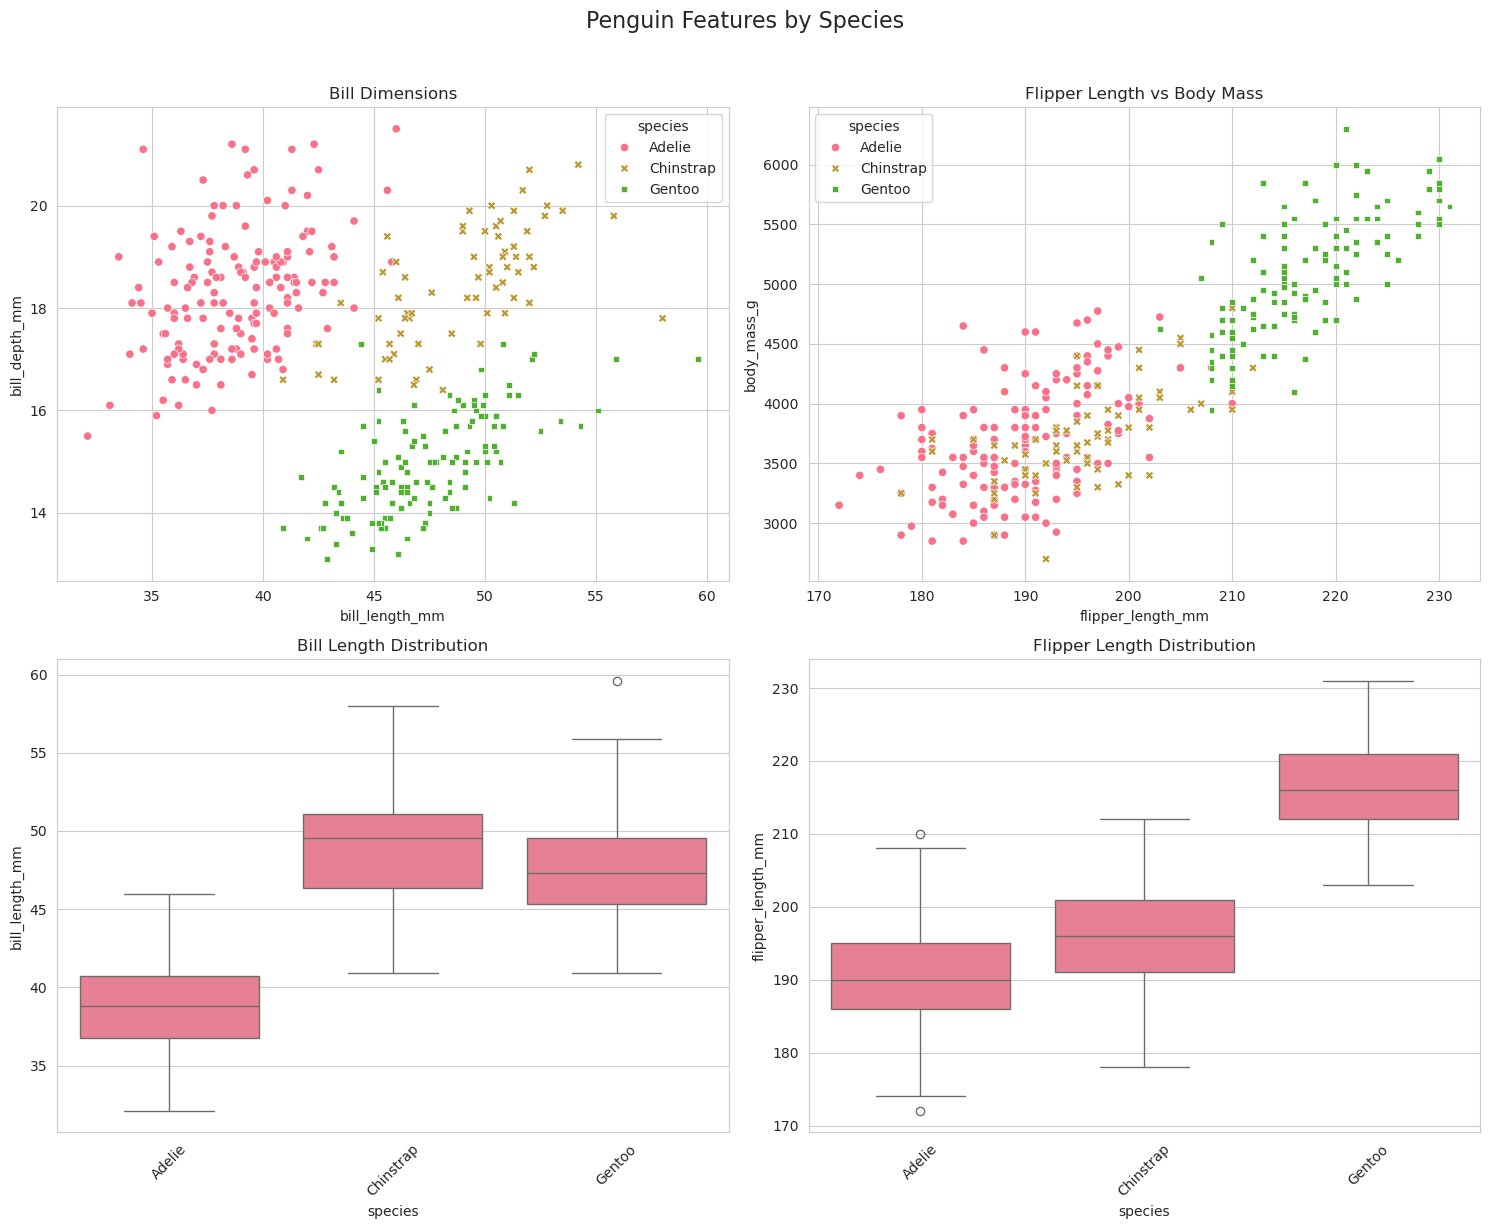

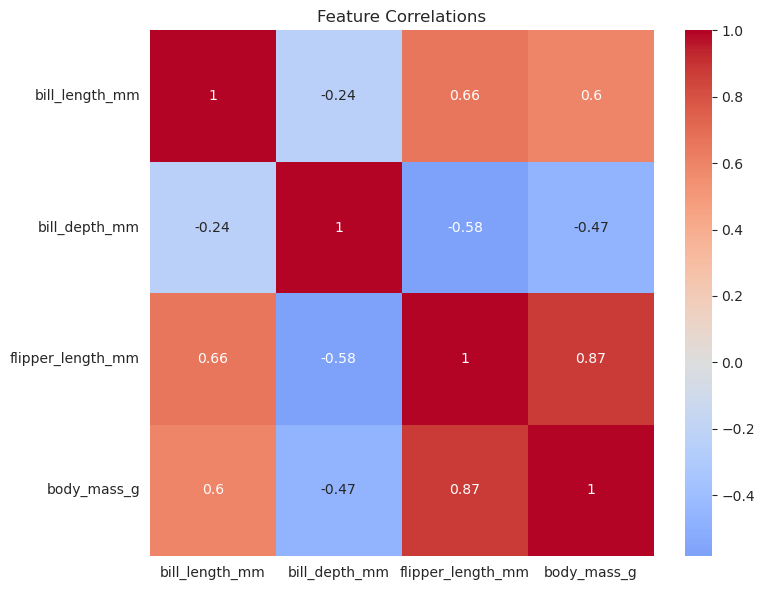

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")


# Initial Data Analysis (IDA)
print("\nDataset Info:")
display(penguins.info())

print("\nMissing Values:")
display(penguins.isnull().sum())

print("\nClass Distribution:")
display(penguins['species'].value_counts())

# Exploratory Data Analysis (EDA)
# Define features we'll use for classification
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

# Set up the plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a figure for our exploratory plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Penguin Features by Species', fontsize=16, y=1.02)

# Plot 1: Bill dimensions by species
sns.scatterplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    style='species',
    ax=axes[0,0]
)
axes[0,0].set_title('Bill Dimensions')

# Plot 2: Flipper length vs Body mass
sns.scatterplot(
    data=penguins,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    style='species',
    ax=axes[0,1]
)
axes[0,1].set_title('Flipper Length vs Body Mass')

# Plot 3: Feature distributions
sns.boxplot(
    data=penguins,
    x='species',
    y='bill_length_mm',
    ax=axes[1,0]
)
axes[1,0].set_title('Bill Length Distribution')
plt.setp(axes[1,0].get_xticklabels(), rotation=45)

# Plot 4: Another important feature distribution
sns.boxplot(
    data=penguins,
    x='species',
    y='flipper_length_mm',
    ax=axes[1,1]
)
axes[1,1].set_title('Flipper Length Distribution')
plt.setp(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()

# Additional useful analysis: Correlation matrix
correlation_matrix = penguins[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.tight_layout()


# We'll use these features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    penguins[features], 
    penguins[target],
    test_size=0.2, 
    random_state=42
)